# k Neareast Neighbors
어디 클러스터에 들어갈지 보는 것: 분류

k: 가장 가까운 점의 갯수를 보는데, 몇개를 볼지 정하는 것, 주로 홀수를 씀

주로 쓰이는 곳: 손글씨, 추천 알고리즘

단점: 오래걸린다.

# kNN 구현하기

In [1]:
data = np.array([['1', '0', 'a'],
                 ['2', '2', 'a'],
                 ['2', '1', 'a'],
                 ['2', '3', 'a'],
                 ['4', '9', 'b'],
                 ['5', '9', 'b'],
                 ['6', '9', 'b'],
                 ['6', '6', 'b'],
                 ['7', '7', 'b'],
                 ['9', '6', 'b']])

In [2]:
x, y, labels = data[:, 0].astype(np.int), data[:, 1].astype(np.int), data[:, 2]

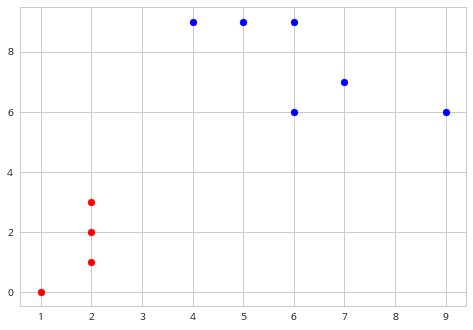

In [3]:
plt.scatter(x[:4], y[:4], c='red')
plt.scatter(x[4:], y[4:], c='blue')
plt.show()

In [4]:
d = np.vstack([x, y]).T
d

array([[1, 0],
       [2, 2],
       [2, 1],
       [2, 3],
       [4, 9],
       [5, 9],
       [6, 9],
       [6, 6],
       [7, 7],
       [9, 6]])

In [5]:
from collections import Counter

def cal_distance(point, data):
    """point에 대한 거리 계산"""
    # dis = np.sqrt((d - point)**2).sum(axis=1))
    dis = np.linalg.norm(d - point, axis=1)
    return dis
    
def get_sorted_index(dis):
    idx = dis.argsort()
    return idx

def get_to_vote(labels, idx, k):
    voters = labels[idx[:k]]
#     vote_labels, vote_index, vote_counts = np.unique(voters, return_index=True, return_counts=True)  
#     winner = labels[vote_index[vote_counts.argmax()]]
#     vote_dict = {v: vote_counts[i] for i, v in enumerate(vote_labels)}
    vote_dict = Counter(voters)
    winner = vote_dict.most_common(1)[0][0]
    return winner, vote_dict

def kNN(k, point, data, labels):
    """point data 차원에 맞게 넣어야함"""
    if k % 2 == 0:
        print('better set "k" an even number')
    dis = cal_distance(point, data)
    idx = get_sorted_index(dis)
    winner, vote_dict = get_to_vote(labels, idx, k)
        
    return winner, vote_dict
    
def draw(point, data):
    x = data[:, 0]
    y = data[:, 1]
    plt.scatter(point[0], point[1], c='green')
    plt.scatter(x[:4], y[:4], c='red')
    plt.scatter(x[4:], y[4:], c='blue')
    plt.show()

In [11]:
# point = np.array([5, 6])
point = np.random.randint(0, 10, size=2)
point

array([3, 4])

In [12]:
winner, vote_dict = kNN(3, point, d, labels)

In [13]:
vote_dict

Counter({'a': 3})

In [14]:
winner

'a'

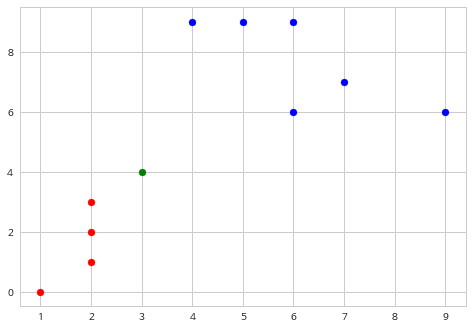

In [15]:
draw(point, d)